In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def get_acc_scores(text_line_start, text_score_start, index_start):

    dev_acc_s = []
    
    for i in range(1, 17):
        dev_acc = []
        file1 = open('results/200/raw/results-200-raw-15iter-' + str(i) + '.txt', 'r') 
        lines = file1.readlines() 
        for line in lines:
            if line.startswith(text_line_start):
                scores = line.split(',')

                for sc in scores:
                    if sc.strip().startswith(text_score_start):
                        sc_fl = float(sc[index_start:])
                        dev_acc.append(sc_fl)

        dev_acc_s.append(dev_acc)

        file1.close()

    return dev_acc_s
        

In [74]:
dev_accuracies = get_acc_scores('train loss', 'dev acc', 9)
train_loss = get_acc_scores('train loss', 'train loss', 12)
test_accuracies = list(get_acc_scores('test acc', 'test acc', 10))
test_precision = get_acc_scores('test acc', 'test precision', 16)
test_recall = get_acc_scores('test acc', 'test recall', 13)
test_f1_score = get_acc_scores('test acc', 'test f1', 9)

In [77]:
def draw_boxplot(data, title):
    plt.clf()
    df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    fig = plt.figure();
    fig.suptitle(title, fontsize=14, fontweight='bold')

    bp = df.T.boxplot(fontsize=14)

<Figure size 1440x360 with 0 Axes>

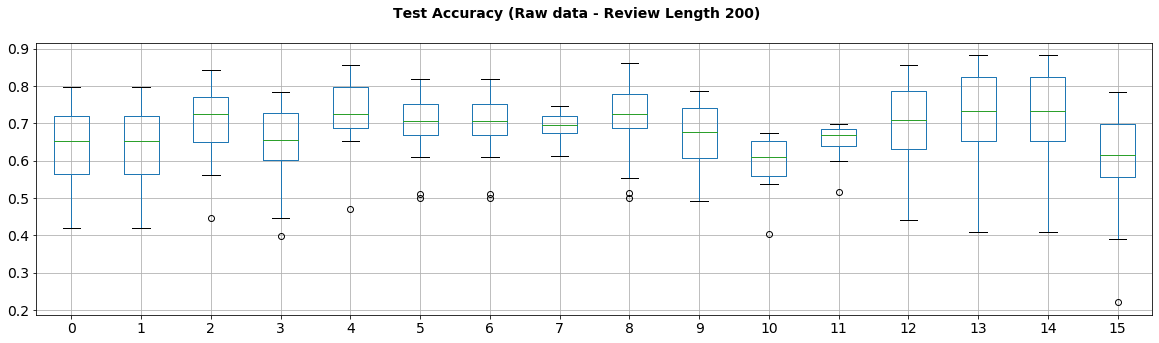

In [78]:
draw_boxplot(test_accuracies, 'Test Accuracy (Raw data - Review Length 200)')

<Figure size 1440x360 with 0 Axes>

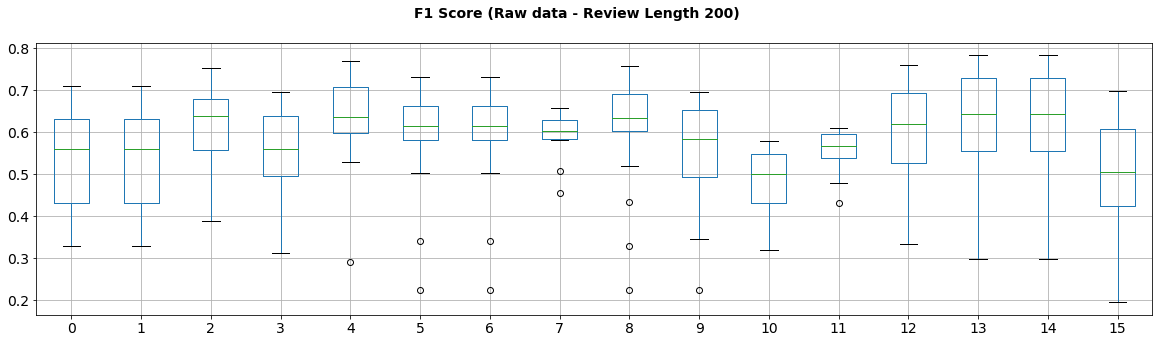

In [60]:
draw_boxplot(test_f1_score, 'F1 Score (Raw data - Review Length 200)')